In [44]:
#Imports
import os
import numpy as np
import pandas as pd
import json
from pprint import pprint

In [45]:
base_dir = "TestResults/DifferentAgeGroups_tfidf/"

tests = []

for f in os.listdir(base_dir):
    with open(base_dir+f, 'r') as file:
        tests.append(json.loads(file.read()))

In [46]:
df = pd.DataFrame.from_dict(tests)

In [47]:
print(df.sort_values('f1', ascending=False)[:10])

          f1                id                labels  \
27  0.738562         5-9_10-15          [10-15, 5-9]   
47  0.732138          5-8_9-15           [5-8, 9-15]   
3   0.726799        5-10_11-15         [11-15, 5-10]   
11  0.693890        5-11_12-15         [12-15, 5-11]   
16  0.674518        5-12_13-15         [13-15, 5-12]   
34  0.603780        5-13_14-15         [14-15, 5-13]   
21  0.515533          5-7_8-15           [5-7, 8-15]   
18  0.499217  5-10_11-13_14-15  [11-13, 14-15, 5-10]   
12  0.497897    5-8_9-12_13-15    [13-15, 5-8, 9-12]   
13  0.492828    5-8_9-13_14-15    [14-15, 5-8, 9-13]   

                                          conf_matrix         c  \
27                           [[792, 201], [168, 368]]  0.974327   
47                          [[204, 165], [123, 1037]]  0.887876   
3                            [[656, 179], [232, 462]]  0.986080   
11                           [[582, 237], [229, 481]]  0.805385   
16                           [[367, 298], [178, 

### Best for three groups

In [48]:
df = df[df['labels'].apply(lambda x: len(x)==2)]

In [49]:
print(df.sort_values('f1', ascending=False))

          f1          id         labels                conf_matrix         c  \
27  0.738562   5-9_10-15   [10-15, 5-9]   [[792, 201], [168, 368]]  0.974327   
47  0.732138    5-8_9-15    [5-8, 9-15]  [[204, 165], [123, 1037]]  0.887876   
3   0.726799  5-10_11-15  [11-15, 5-10]   [[656, 179], [232, 462]]  0.986080   
11  0.693890  5-11_12-15  [12-15, 5-11]   [[582, 237], [229, 481]]  0.805385   
16  0.674518  5-12_13-15  [13-15, 5-12]   [[367, 298], [178, 686]]  0.395048   
34  0.603780  5-13_14-15  [14-15, 5-13]   [[224, 336], [190, 779]]  0.996486   
21  0.515533    5-7_8-15    [5-7, 8-15]    [[11, 160], [37, 1321]]  0.203337   
32  0.489312    5-6_7-15    [5-6, 7-15]       [[0, 64], [0, 1465]]  0.335724   

                                        c_eval_scores  
27  [[0.2053317816779653, 0.518964043612552], [0.6...  
47  [[0.2379000938068585, 0.7024071538741486], [0....  
3   [[0.0012386245445910483, 0.4664720646006111], ...  
11  [[0.00015110657080629627, 0.44745127812916946]...  

In [50]:
worst_predicts = np.array(df.sort_values('f1')[:1]['conf_matrix'].to_numpy()[0])
worst_labels = df.sort_values('f1')[:1]['labels'].to_numpy()[0]

In [51]:
best_predicts = np.array(df.sort_values('f1', ascending=False)[:1]['conf_matrix'].to_numpy()[0])
best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

In [52]:
from sklearn import metrics
p = metrics.ConfusionMatrixDisplay(confusion_matrix=worst_predicts, display_labels=worst_labels)

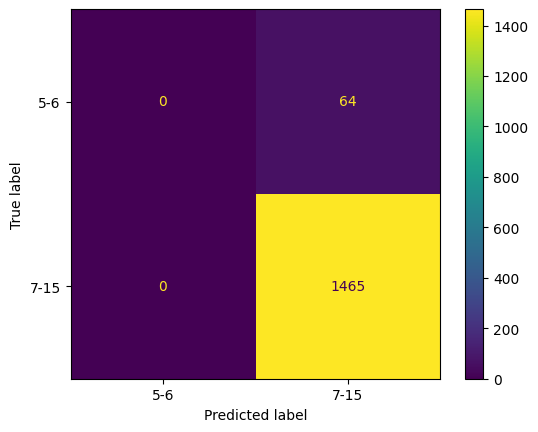

In [53]:
p.plot()

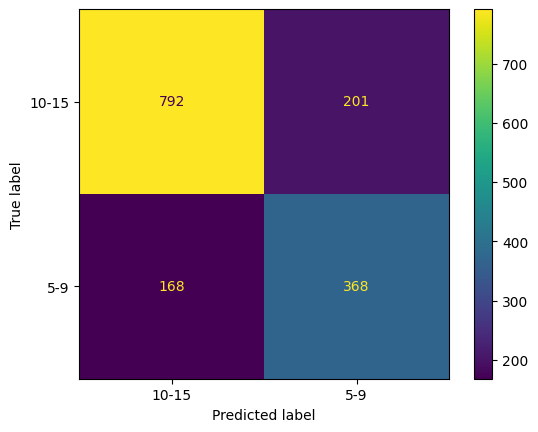

In [54]:
p = metrics.ConfusionMatrixDisplay(confusion_matrix=best_predicts, display_labels=best_labels)
p.plot()